**Name : Clarissa Beatrice Kosasih  
NIM : 2702209350**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

In [ ]:
SEED = 42
np.random.seed(SEED)
random.seed(SEED)

In [ ]:
data = pd.read_csv('train.csv')
data.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              90615 non-null  int64  
 1   Sex             90615 non-null  object 
 2   Length          90615 non-null  float64
 3   Diameter        90615 non-null  float64
 4   Height          90615 non-null  float64
 5   Whole weight    90615 non-null  float64
 6   Whole weight.1  90615 non-null  float64
 7   Whole weight.2  90615 non-null  float64
 8   Shell weight    90615 non-null  float64
 9   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 6.9+ MB


Terdapat 10 kolom (7 kolom float, 2 kolom integer, dan 1 kolom object) dan 90,614 baris.

# Data Preprocessing

## Handling Missing Values

In [ ]:
data.isna().sum()

,0
id,0
Sex,0
Length,0
Diameter,0
Height,0
Whole weight,0
Whole weight.1,0
Whole weight.2,0
Shell weight,0
Rings,0


Tidak ada missing value pada dataset ini.

## Handling Duplicates

In [ ]:
data.duplicated().sum()

np.int64(0)

Tidak ada duplicate juga. Oleh karena itu dapat disimpulkan bahwa dataset ini sudah clean dan siap untuk diolah.

# EDA

# Search and Drop Unique Column

In [ ]:
data.nunique()

,0
id,90615
Sex,3
Length,157
Diameter,126
Height,90
Whole weight,3175
Whole weight.1,1799
Whole weight.2,979
Shell weight,1129
Rings,28


`id` berisikan unique value sehingga dapat memengaruhi performa model. Maka dari itu, kolom `id` akan didrop.

In [ ]:
data = data.drop('id', axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  object 
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 6.2+ MB


## Distribution of Numerical Columns

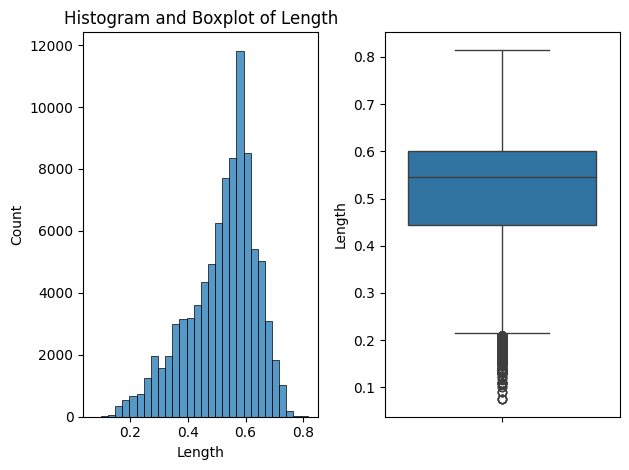

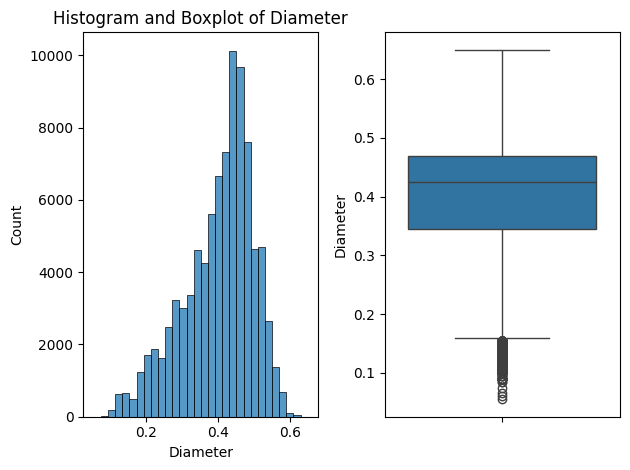

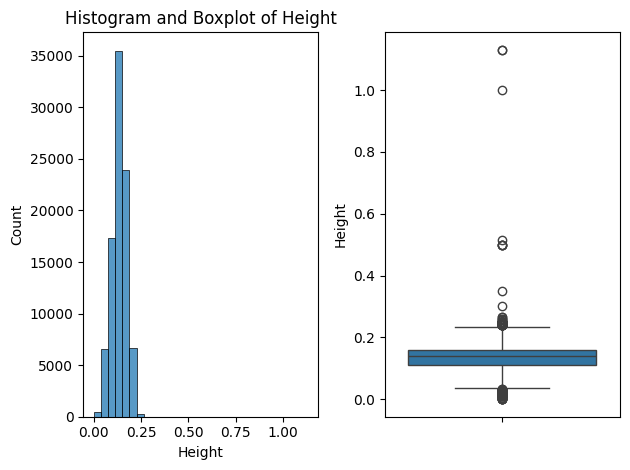

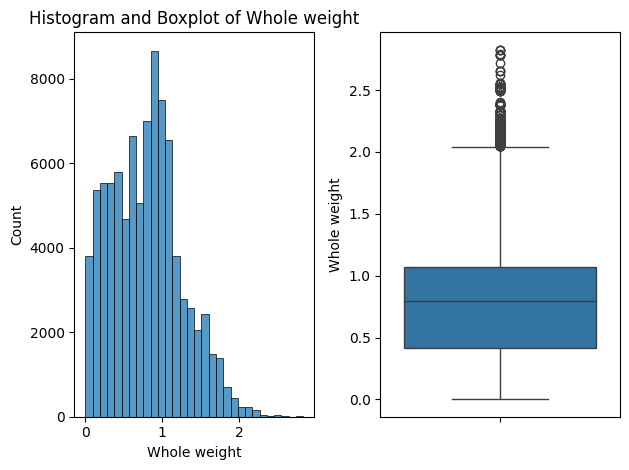

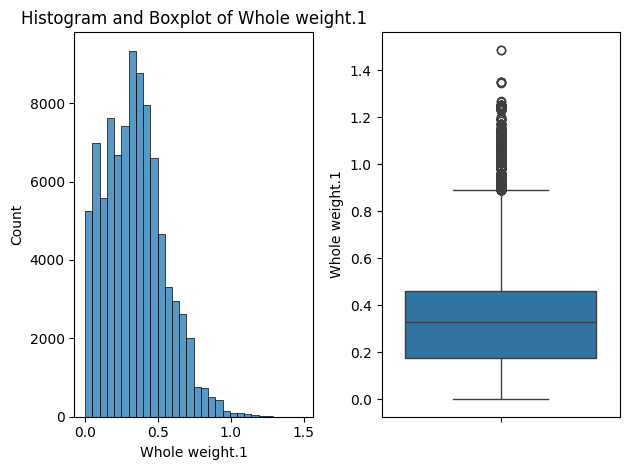

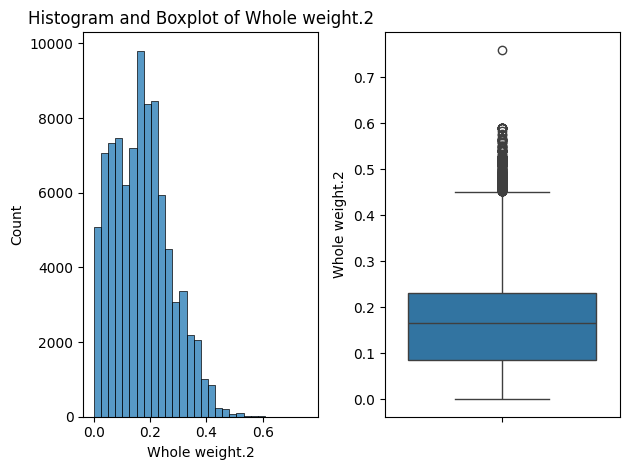

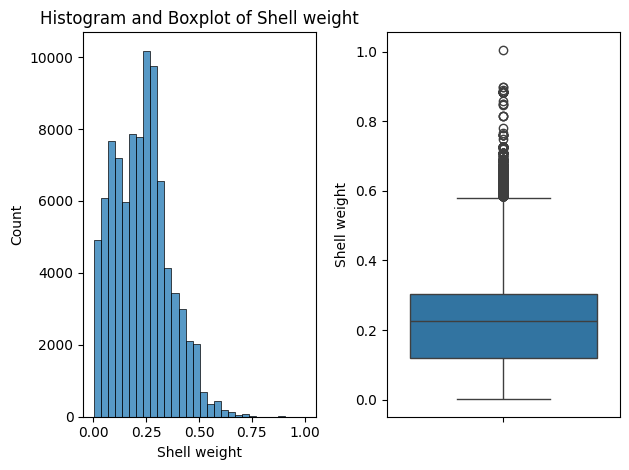

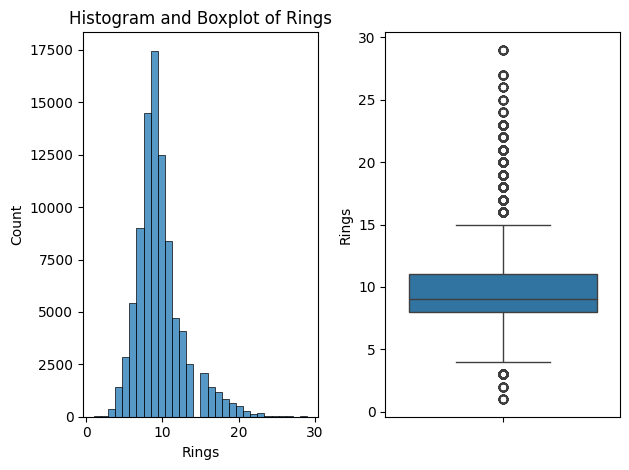

In [ ]:
numerical_cols = data.select_dtypes(include=['number']).columns

for i in numerical_cols:
  plt.subplot(1,2,1)
  sns.histplot(data[i], bins = 30)
  plt.title(f"Histogram and Boxplot of {i}")

  plt.subplot(1,2,2)
  sns.boxplot(data[i])
  plt.tight_layout()
  plt.show()

Karena banyak kolom numerik mengandung outlier, maka Robust Scaler dipilih untuk proses scaling karena lebih tahan terhadap outlier.

In [ ]:
for col in numerical_cols:
  print(f"\n====== {col} ======")
  print(data[col].describe())


====== Length ======
count    90615.000000
mean         0.517098
std          0.118217
min          0.075000
25%          0.445000
50%          0.545000
75%          0.600000
max          0.815000
Name: Length, dtype: float64

====== Diameter ======
count    90615.000000
mean         0.401679
std          0.098026
min          0.055000
25%          0.345000
50%          0.425000
75%          0.470000
max          0.650000
Name: Diameter, dtype: float64

====== Height ======
count    90615.000000
mean         0.135464
std          0.038008
min          0.000000
25%          0.110000
50%          0.140000
75%          0.160000
max          1.130000
Name: Height, dtype: float64

====== Whole weight ======
count    90615.000000
mean         0.789035
std          0.457671
min          0.002000
25%          0.419000
50%          0.799500
75%          1.067500
max          2.825500
Name: Whole weight, dtype: float64

====== Whole weight.1 ======
count    90615.000000
mean         0.340778
st

Tidak ada nilai-nilai yang tidak masuk akal, misalnya nilai dibawah nol (negatif).

In [ ]:
data['Rings'].value_counts()

,count
Rings,
9,17465
8,14499
10,12464
7,9008
11,8407
6,5411
12,4719
13,4074
5,2862


## Distribution of Categorical Columns

In [ ]:
categorical_cols = data.select_dtypes(include=['object', 'category']).columns

for col in categorical_cols:
  print(data[col].value_counts())
  print("---------------------")

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64
---------------------


Tidak ada kesalahan pada data ini. 'I' adalah infant sehingga belum dapat dipastikan betina atau jantan.

# Encoding

In [ ]:
encoders = {'Sex' : {'M': 0, 'F': 1, 'I': 2}}

In [ ]:
for col, mapping in encoders.items():
    data[col] = data[col].replace(mapping)

data.head()

<ipython-input-14-814153c0b5cc>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[col] = data[col].replace(mapping)


,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,1,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,0,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,2,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90615 entries, 0 to 90614
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             90615 non-null  int64  
 1   Length          90615 non-null  float64
 2   Diameter        90615 non-null  float64
 3   Height          90615 non-null  float64
 4   Whole weight    90615 non-null  float64
 5   Whole weight.1  90615 non-null  float64
 6   Whole weight.2  90615 non-null  float64
 7   Shell weight    90615 non-null  float64
 8   Rings           90615 non-null  int64  
dtypes: float64(7), int64(2)
memory usage: 6.2 MB


Semua kolom sudah dalam numerik.

# Data Splitting

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.drop('Rings', axis=1)
y = data['Rings']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = SEED)

print(f"X_train : {X_train.shape}")
print(f"X_test : {X_test.shape}")
print(f"y_train : {y_train.shape}")
print(f"y_test : {y_test.shape}")

X_train : (72492, 8)
X_test : (18123, 8)
y_train : (72492,)
y_test : (18123,)


# Scaling
Scaling menggunakan Robust Scaler karena adanya outlier.

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
X_train

array([[-0.5       ,  0.70967742,  0.64      , ...,  1.33978873,
         0.93150685,  0.72972973],
       [ 0.        ,  0.83870968,  0.76      , ...,  1.08098592,
         1.22945205,  0.86486486],
       [-0.5       ,  0.41935484,  0.56      , ...,  0.80457746,
         0.55479452,  0.32432432],
       ...,
       [ 0.5       , -0.06451613, -0.04      , ..., -0.27992958,
        -0.15410959, -0.2972973 ],
       [-0.5       ,  1.        ,  0.8       , ...,  1.95422535,
         1.66780822,  1.48108108],
       [ 0.5       , -1.09677419, -1.2       , ..., -0.82394366,
        -0.82534247, -0.78378378]])

In [ ]:
X_test

array([[ 0.5       , -0.32258065, -0.36      , ..., -0.39964789,
        -0.19520548, -0.37837838],
       [ 0.5       , -0.77419355, -0.64      , ..., -0.58978873,
        -0.59246575, -0.66216216],
       [-0.5       ,  0.09677419,  0.12      , ...,  0.07570423,
        -0.05821918,  0.05405405],
       ...,
       [ 0.        , -0.58064516, -0.6       , ..., -0.49119718,
        -0.28424658, -0.37837838],
       [-0.5       ,  0.83870968,  0.64      , ...,  0.74823944,
         1.07534247,  0.80810811],
       [-0.5       ,  0.38709677,  0.36      , ...,  0.37852113,
         0.69863014,  0.32432432]])

# Training

In [ ]:
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [ ]:
model = RandomForestRegressor(n_estimators=50, max_depth=12)

model.fit(X_train, y_train)
model_pred = model.predict(X_test)

## Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

In [ ]:
rmse = mean_squared_error(y_test, model_pred)
print(f"RMSE : {rmse}")

r2 = r2_score(y_test, model_pred)
print(f"R2 : {r2}")

mae = mean_absolute_error(y_test, model_pred)
print(f"MAE : {mae}")

mape = mean_absolute_percentage_error(y_test, model_pred)
print(f"MAPE : {mape}")

RMSE : 3.559344911892737
R2 : 0.6535025727846102
MAE : 1.2699500844517977
MAPE : 0.1288773807929161


# Save as Pickle

In [ ]:
import pickle

In [ ]:
with open('encoders.pkl', 'wb') as file:
    pickle.dump(encoders, file)

with open('model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [ ]:
import os
print(f"Model size: {os.path.getsize('model.pkl') / (1024*1024):.2f} MB")

Model size: 14.80 MB
